<a href="https://colab.research.google.com/github/sharmaanj200/AI-ML-Month/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART FAILURE PREDICTION**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab work/heart_failure_clinical_records_dataset.csv')

FileNotFoundError: ignored

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(299, 13)

In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Check if the data has any null values in the columns
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# **EXPLORATORY DATA ANALYSIS**

---



In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Age of participants vs their count')

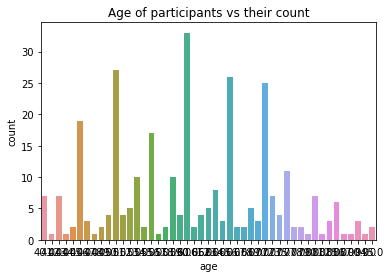

In [ ]:
sns.countplot(data['age'])
plt.title("Age of participants vs their count")

In [ ]:
data.DEATH_EVENT.unique()

array([1, 0])

In [ ]:
# Verify Number of Death Event
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Total number of living cases are represented by 0

Total number of dead cases: are represented by 1

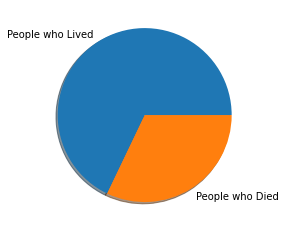

In [ ]:
dead = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])
alive = len(data.DEATH_EVENT[data.DEATH_EVENT == 0])

arr = np.array([alive, dead])
labels = ["People who Lived", "People who Died"]

plt.pie(arr, labels=labels, shadow=True)
plt.show()

Text(0.5, 1.0, 'A comparison between people with anaemia who experienced Heart Failure')

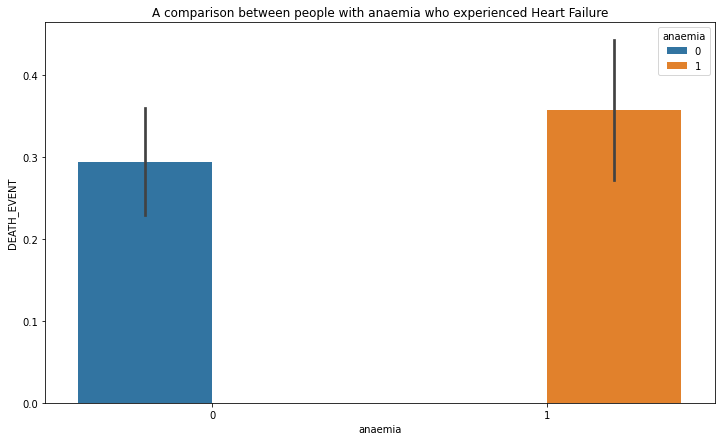

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='anaemia', y='DEATH_EVENT', hue=data['anaemia'], data=data)
plt.title("A comparison between people with anaemia who experienced Heart Failure")

In [ ]:
print("Total number of living cases : 0")
print("Total number of dead cases:  1")

fig = px.bar(data, x='DEATH_EVENT', y='diabetes')
fig.show()

Total number of living cases : 0
Total number of dead cases:  1


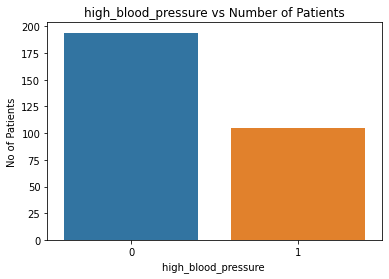

In [ ]:
sns.countplot(data['high_blood_pressure'])
plt.xlabel('high_blood_pressure ')
plt.ylabel('No of Patients')
plt.title('high_blood_pressure vs Number of Patients')
plt.show()

# **MACHINE LEARNING MODELS**

---



We have used three machine learning, namely Descision Tree, Logistic Regression and Random Forest to predict Heart Failure.

Before we begin with the models, here are the safe levels of the various parameters given in the dataset:

safe level of creatinine phosphokinase - Total CPK normal values: 10 to 120 mg/l

safe level of ejection fraction - A normal ejection fraction is about 50% to 75%

safe level of platelets - 150,000 to 450,000 platelets per microliter of blood.

safe level of serum creatinine - For adult men, 0.74 to 1.35 mg/dL,For adult women, 0.59 to 1.04 mg/dL

safe level of serum sodium - between 135 and 145 milliequivalents per liter

# **LOGISTIC REGRESSION**

*Why Logistic Regression?*

This is because the Logistic Regression Algorithm as it focuses on speed over accuracy while providing explainable results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
#importing the Logistic Regression class and creating an object of it

from sklearn.linear_model import LogisticRegression
modl = LogisticRegression()

In [ ]:
x = data.drop(['DEATH_EVENT','time'], axis=1)
y = data.DEATH_EVENT

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [ ]:
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
24,75.000,0,582,1,30,1,263358.03,1.83,134,0,0
64,45.000,0,582,0,80,0,263358.03,1.18,137,0,0
102,80.000,0,898,0,25,0,149000.00,1.10,144,1,1
170,51.000,1,582,1,35,0,263358.03,1.50,136,1,1
285,55.000,1,170,1,40,0,336000.00,1.20,135,1,0
139,50.000,0,1548,0,30,1,211000.00,0.80,138,1,0
198,50.000,1,582,1,20,1,279000.00,1.00,134,0,0
129,53.000,1,270,1,35,0,227000.00,3.40,145,1,0
292,52.000,0,190,1,38,0,382000.00,1.00,140,1,1
280,70.000,0,2695,1,40,0,241000.00,1.00,137,1,0


In [ ]:
y_test

24     1
64     0
102    0
170    0
285    0
139    0
198    0
129    0
292    0
280    0
240    0
43     0
191    0
254    0
293    0
26     1
65     1
253    0
127    0
274    0
52     1
188    0
233    0
121    0
100    0
114    0
186    1
282    0
119    1
131    0
47     1
183    1
25     1
164    1
184    1
111    0
257    0
228    0
138    0
181    1
76     0
70     0
92     0
281    0
235    0
180    0
137    0
105    1
36     1
10     1
98     0
279    0
174    0
260    0
193    0
234    0
175    0
59     1
56     0
35     1
Name: DEATH_EVENT, dtype: int64

In [ ]:
modl.fit(x_train,y_train)

LogisticRegression()

In [ ]:
modl.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
modl.score(x_test, y_test)

0.7833333333333333

In [ ]:
modl.predict_proba(x_test)

array([[0.36369184, 0.63630816],
       [0.98992663, 0.01007337],
       [0.24026465, 0.75973535],
       [0.77489482, 0.22510518],
       [0.80350979, 0.19649021],
       [0.70131203, 0.29868797],
       [0.57154977, 0.42845023],
       [0.77584702, 0.22415298],
       [0.82550079, 0.17449921],
       [0.54732281, 0.45267719],
       [0.59108411, 0.40891589],
       [0.72574878, 0.27425122],
       [0.89904124, 0.10095876],
       [0.94425485, 0.05574515],
       [0.62861805, 0.37138195],
       [0.26485716, 0.73514284],
       [0.38777696, 0.61222304],
       [0.52180563, 0.47819437],
       [0.92798993, 0.07201007],
       [0.58718684, 0.41281316],
       [0.89965112, 0.10034888],
       [0.73154549, 0.26845451],
       [0.79517831, 0.20482169],
       [0.63108362, 0.36891638],
       [0.46591971, 0.53408029],
       [0.71318613, 0.28681387],
       [0.90016521, 0.09983479],
       [0.79385171, 0.20614829],
       [0.33469672, 0.66530328],
       [0.76696649, 0.23303351],
       [0.

**EXAMPLES TO TEST THE LOGISTIC REGRESSION MODEL**

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Example 1: An older person anaemic, diabetic, person who doesn't smoke

In [ ]:
pre = modl.predict([[65,1,160,1,20,0,327000,2.7,116,0,0]])
print(pre)

[1]


Conclusion: Stands a chance of heart failure.

Example 2: A middle aged individual who is anaemic, diabetic, 

In [ ]:
modl.predict([[55,0,1820,0,38,0,270000,1.2,139,0,0] ])

array([0])

Conclusion: Chances of Heart Failure are low

Example 3: A middle aged person with no underlying condition or smoking

In [ ]:
modl.predict([[30.0, 0, 100, 0, 65, 0, 400000.00, 0.90, 140, 1, 0]])

array([0])

Conclusion: No risk of heart failure

The following code can be used to generate random values to check for the consistency of the model from the data given


In [ ]:
list1 = (x_test.sample())
print(list1)

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
36  90.0        1                        60         1                 50   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
36                    0   226000.0               1.0           134    1   

    smoking  
36        0  


In [ ]:
modl.predict(list1)

array([1])

**CONFUSION MATRIX**

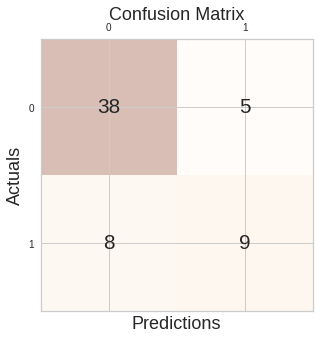

In [ ]:
y_pred = modl.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for a in range(conf_matrix.shape[0]):
    for b in range(conf_matrix.shape[1]):
        ax.text(x=b, y=a, s=conf_matrix[a, b], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


**F1 SCORE**

In [ ]:
matrix1 = classification_report(y_test, y_pred)
print("Classiffication reports : \n\n", matrix1)

Classiffication reports : 

               precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.64      0.53      0.58        17

    accuracy                           0.78        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.77      0.78      0.78        60



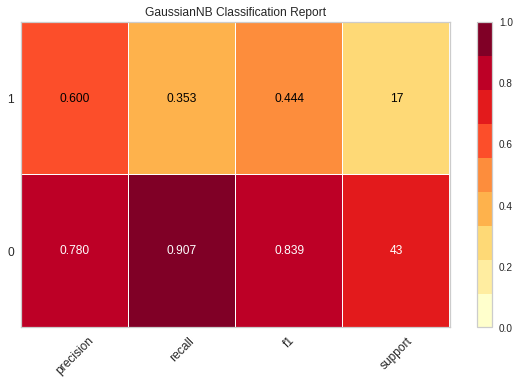

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, support=True)

visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()             # Draw/show the data

# **RANDOM FOREST**




*Why Random Forest?*

This time, we prioritise accuracy over speed for our dataset which isn't very large. For this, Random Forest is an understandable method for predicting heart failure.

In [ ]:
X = data.drop(['DEATH_EVENT','time'], axis=1)
Y = data.DEATH_EVENT

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bro = RandomForestClassifier(n_estimators=30)

In [ ]:
bro.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
bro.score(X_test,Y_test)

0.7333333333333333

In [ ]:
y_predicted = bro.predict(X_test)
y_predicted

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

**EXAMPLES TO TEST RANDOM FOREST MODEL**

Example 1: A middle aged individual with no underlying conditions

In [ ]:
pred = bro.predict([[55,0,1820,0,38,0,270000,1.2,139,0,0]])
pred

array([0])

Conclusion: No chance of heart failure

Example 2: An old anaemic, diabetic individual

In [ ]:
bro.predict([[65,1,160,1,20,0,327000,2.7,116,0,0]])


array([1])

Conclusion: Chances of heart failure exist 

Example 3: An old individual with high blood pressure

In [ ]:
bro.predict([[75.0,0,582,0,20,1,265000.00,1.9,130,1,0]])

array([1])

Conclusion: Higher chance of heart failure

**CONFUSION MATRIX**

In [ ]:
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[35,  8],
       [ 8,  9]])

Text(69.0, 0.5, 'Truth')

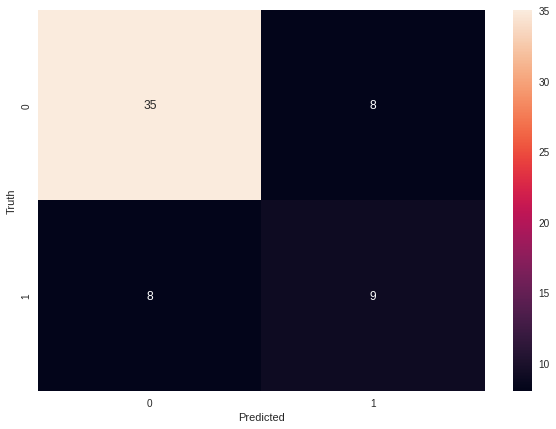

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**F1 SCORE**

In [ ]:
matrix2 = classification_report(Y_test, y_predicted)
print("Classiffication reports : \n\n", matrix2)

Classiffication reports : 

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.53      0.53      0.53        17

    accuracy                           0.73        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.73      0.73      0.73        60



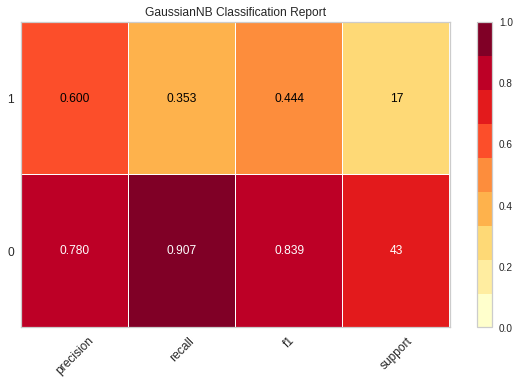

In [ ]:
# Instantiate the classification model and visualizer
bayes2 = GaussianNB()
visualizer2 = ClassificationReport(bayes2, support=True)

visualizer2.fit(X_train, Y_train)  # Fit the visualizer and the model
visualizer2.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer2.show()             # Draw/show the data

# **DECISION TREE MODEL**



*WHY IS THIS MODEL USED?*

THE DATASET IS HIGHLY NON LINEAR AND DECISION TREE WORKS BEST FOR DATASETS OF THESE KIND.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [ ]:
A = data.drop(['DEATH_EVENT'], axis = 1)
A

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
X.shape

(299, 11)

In [ ]:
B = data['DEATH_EVENT']
B

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [ ]:
model = DecisionTreeClassifier()
model.fit(A, B)
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


**EXAMPLES TO TEST DESCISION TREE MODEL**

1. A middle aged person with normal conditions

In [ ]:
predictions = model.predict([[55,0,1820,0,38,0,650000,1.2,139,0,0,0]])
predictions

array([0])

Conclusion: Heart failure rate is low

2. An older woman with diabetes, high blood pressure, anaemia, low platelets and who smokes

In [ ]:
predictions = model.predict([[70.0, 1, 110, 1, 65, 1, 100000.00, 0.45, 130, 0, 1,1]])
predictions

array([1])

Conclusion: Heart failure rate is high

3. A teenage girl who smokes but has normal health conditions.

In [ ]:
predictions = model.predict([[18.0, 0, 100, 0, 63, 0, 300000.00, 0.90, 130, 0, 1,1]])
predictions

array([0])

Conclusion: Heart failure rate is low.

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.20,  stratify = y, random_state=2)
scaler = StandardScaler()
scaler.fit(A)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(A)

In [ ]:
A = standardized_data
B = data["DEATH_EVENT"]

In [ ]:
model.fit(A_train, B_train)
predictions = model.predict(A_test)
score = accuracy_score(B_test, predictions)
score

0.85

**CONFUSION MATRIX - DECISION TREE ALGORITHM**

In [ ]:
confusion_matrix(B_test, predictions)

array([[37,  4],
       [ 5, 14]])

In [ ]:
tn, tp, fn, fp = confusion_matrix(B_test, predictions).ravel()

In [ ]:
(tn, tp, fn, fp)

(37, 4, 5, 14)

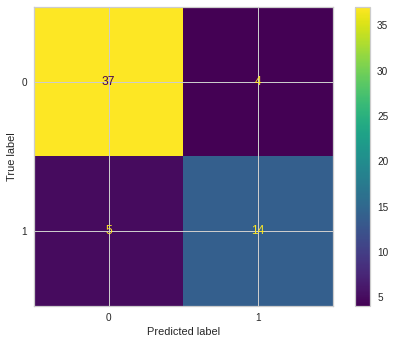

In [ ]:
plot_confusion_matrix(model, A_test, B_test)  
plt.show()

**F1 Scores**

In [ ]:
#confusion matrix metrices
matrix = classification_report(B_test, predictions)
print("Classiffication reports : \n\n", matrix)

Classiffication reports : 

               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



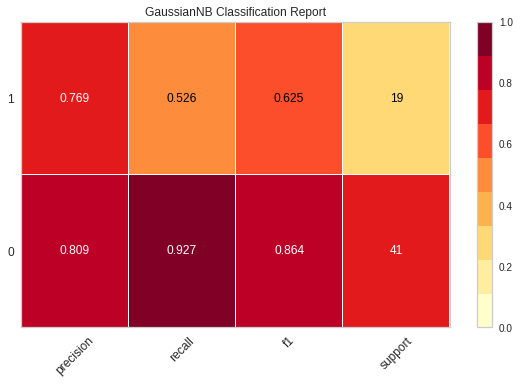

In [ ]:
# Instantiate the classification model and visualizer
bayes3 = GaussianNB()
visualizer3 = ClassificationReport(bayes3, support=True)

visualizer3.fit(A_train, B_train)  # Fit the visualizer and the model
visualizer3.score(A_test, B_test)  # Evaluate the model on the test data
visualizer3.show()             # Draw/show the data

# **BEST MODEL**

---



In order to check for the best model, we plot a graph between the accuracy of f1 scores vs model used as shown:

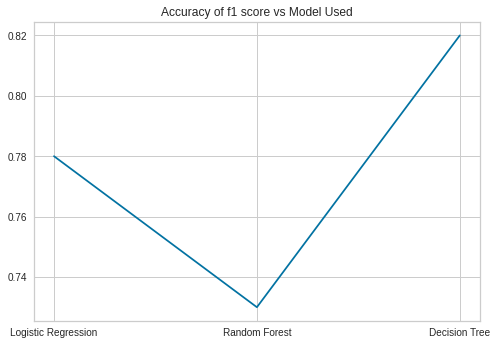

In [ ]:
arr = [0.78,0.73,0.82]
model_name = ['Logistic Regression','Random Forest','Decision Tree']
plt.plot(model_name,arr)
plt.title('Accuracy of f1 score vs Model Used')
plt.show()

We, therefore, conclude that the Decision Tree Model gives the best prediction for our given dataset.



---

